## 1. Data processing : 데이터 전처리

## 2. 결측치

### (1) 코드 예시

In [36]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

In [37]:
sm_df = fdr.DataReader('005930', '2022', '2023')
sm_df = sm_df["Close"]

In [38]:
ex_df = fdr.DataReader('USD/KRW', '2022', '2023')
ex_df = ex_df["Close"]

In [39]:
all_df = pd.concat([sm_df,ex_df], axis=1)
all_df.columns = ["sm_Close", "ex_Close"]
all_df

,sm_Close,ex_Close
Date,,
2022-01-03,78600.0,1187.780029
2022-01-04,78700.0,1194.680054
2022-01-05,77400.0,1196.500000
2022-01-06,76900.0,1199.250000
2022-01-07,78300.0,1205.780029
...,...,...
2022-12-26,57900.0,1279.239990
2022-12-27,58100.0,1275.130005
2022-12-28,56600.0,1272.280029


In [40]:
print(all_df.isnull().sum())
all_df[all_df["sm_Close"].isnull()]

sm_Close    14
ex_Close     0
dtype: int64


,sm_Close,ex_Close
Date,,
2022-01-31,NaN,1207.709961
2022-02-01,NaN,1205.119995
2022-02-02,NaN,1202.500000
2022-03-01,NaN,1200.930054
2022-03-09,NaN,1233.109985
2022-05-05,NaN,1251.500000
2022-06-01,NaN,1241.739990
2022-06-06,NaN,1250.530029
2022-08-15,NaN,1301.380005


In [41]:
all_df_drop = all_df.dropna()
print(all_df_drop.isnull().sum())
all_df_drop

sm_Close    0
ex_Close    0
dtype: int64


,sm_Close,ex_Close
Date,,
2022-01-03,78600.0,1187.780029
2022-01-04,78700.0,1194.680054
2022-01-05,77400.0,1196.500000
2022-01-06,76900.0,1199.250000
2022-01-07,78300.0,1205.780029
...,...,...
2022-12-23,58100.0,1290.199951
2022-12-26,57900.0,1279.239990
2022-12-27,58100.0,1275.130005


In [42]:
print(all_df.mean())
all_df_fill = all_df.fillna(round(all_df.mean()))

sm_Close    63935.365854
ex_Close     1291.037695
dtype: float64


In [43]:
index = all_df[all_df["sm_Close"].isnull()].index
all_df_fill.loc[index]

,sm_Close,ex_Close
Date,,
2022-01-31,63935.0,1207.709961
2022-02-01,63935.0,1205.119995
2022-02-02,63935.0,1202.500000
2022-03-01,63935.0,1200.930054
2022-03-09,63935.0,1233.109985
2022-05-05,63935.0,1251.500000
2022-06-01,63935.0,1241.739990
2022-06-06,63935.0,1250.530029
2022-08-15,63935.0,1301.380005


## 3 이상치

### (1) 이상치로 판단하는 방법

### (2) 처리방법

### (3) 이상치 처리하기

In [46]:
import matplotlib.pyplot as plt
kakao = fdr.DataReader("035720", "20220101", "20221231")
kakao["Change"] = kakao["Change"]*100

Text(0, 0.5, 'Change')

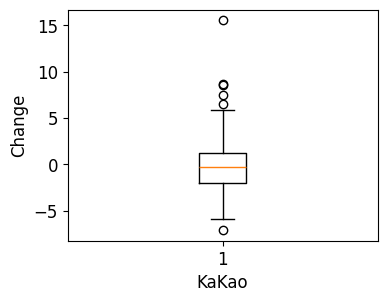

In [49]:
plt.style.use("default")
plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams["font.size"] = 12
fig, ax = plt.subplots()
ax.boxplot(kakao["Change"])
ax.set_xlabel("KaKao")
ax.set_ylabel("Change")

In [53]:
def get_outlier(df, column, weight=1.5):

    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    iqr = quantitle_75 - quantitle_25
    iqr_weight = iqr*weight

    highest = quantitle_75 + iqr_wegith

    outlier_inx = df[column][ (df[column] < lowest) | (df[column] > lowest) ].index
    return outlier_idx
 
    outlier_idx = get_outlier(kakao, "Change", weight=1.5)
    kakao.drop(outlier_idx, axis=0, inplace=True)

Text(0, 0.5, 'Change')

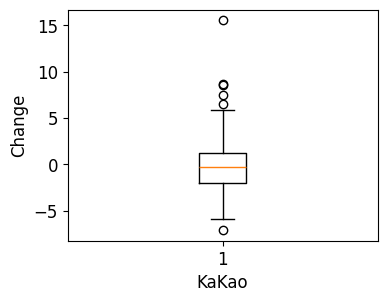

In [54]:
plt.style.use("default")
plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams["font.size"] = 12
fig, ax = plt.subplots()
ax.boxplot(kakao["Change"])
ax.set_xlabel("KaKao")
ax.set_ylabel("Change")

In [55]:
kakao = fdr.DataReader("035720", "20220101", "20221231")
kakao["Change"] = kakao["Change"]*100
kakao.reset_index(inplace=True)

<Axes: xlabel='Date', ylabel='Change'>

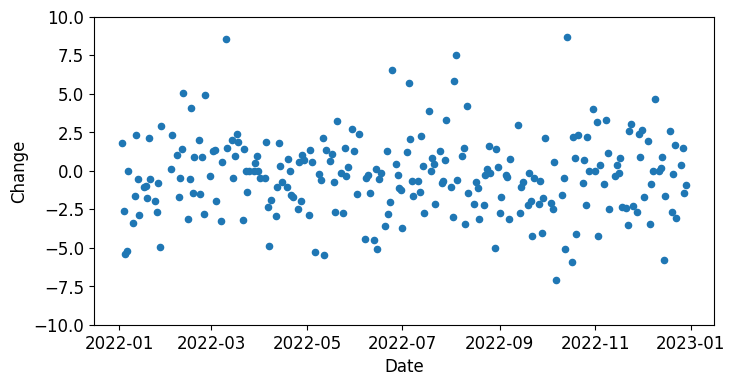

In [56]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 12
kakao.plot(kind='scatter', x='Date', y='Change', ylim=(-10, 10))

<Axes: xlabel='Date', ylabel='Change'>

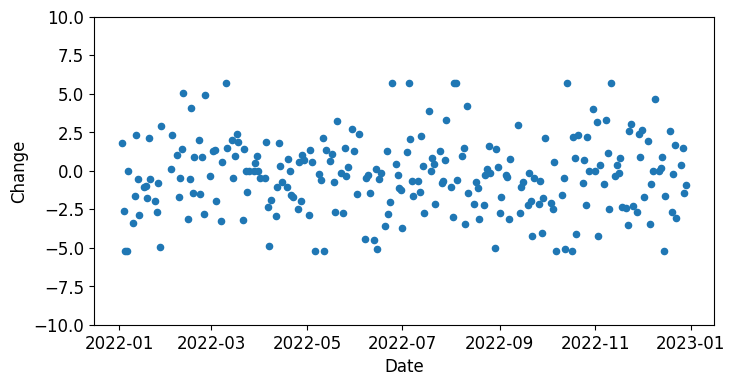

In [58]:
from scipy.stats.mstats import winsorize
kakao["Change"] = winsorize(kakao["Change"], limits = (0.025, 0.025))
kakao.plot(kind="scatter", x="Date", y="Change", ylim=(-10, 10))

## 4. 스케일링

### (1) 정규화(Normalization)：min-max normalization

In [59]:
sm = fdr.DataReader("005930", "20220101", "20221231")
lgc = fdr.DataReader("051910", "20220101", "20221231")

In [64]:
all = pd.DataFrame()
all["sm_close"] = sm["Close"]
all["lgc_close"] = lgc["Close"]
all

,sm_close,lgc_close
Date,,
2022-01-03,78600,618000
2022-01-04,78700,644000
2022-01-05,77400,664000
2022-01-06,76900,690000
2022-01-07,78300,719000
...,...,...
2022-12-23,58100,610000
2022-12-26,57900,618000
2022-12-27,58100,628000


### (2) 표준화 스케일링 적용해보기

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
std.fit(all)
data = std.transform(all)

In [67]:
all[["sm_close", "lgc_close"]] = data
all

,sm_close,lgc_close
Date,,
2022-01-03,2.217836,0.343837
2022-01-04,2.232960,0.705754
2022-01-05,2.036352,0.984151
2022-01-06,1.960733,1.346067
2022-01-07,2.172465,1.749742
...,...,...
2022-12-23,-0.882524,0.232479
2022-12-26,-0.912771,0.343837
2022-12-27,-0.882524,0.483036


In [68]:
all.mean(),all.var()

(sm_close     1.733031e-16
 lgc_close   -4.043739e-16
 dtype: float64,
 sm_close     1.004082
 lgc_close    1.004082
 dtype: float64)

### (3) 데이터 정규화하기

In [69]:
mms = MinMaxScaler()
mms.fit(all)
data = mms.transform(all)

In [70]:
all[["sm_close", "lgc_close"]] = data
all

,sm_close,lgc_close
Date,,
2022-01-03,0.988593,0.535928
2022-01-04,0.992395,0.613772
2022-01-05,0.942966,0.673653
2022-01-06,0.923954,0.751497
2022-01-07,0.977186,0.838323
...,...,...
2022-12-23,0.209125,0.511976
2022-12-26,0.201521,0.535928
2022-12-27,0.209125,0.565868


In [71]:
all.min(),all.max()

(sm_close     0.0
 lgc_close    0.0
 dtype: float64,
 sm_close     1.0
 lgc_close    1.0
 dtype: float64)

## 5.로그

### (1) 코드예시

In [72]:
from pykrx import stock
df = stock.get_market_cap("20230131")
df

,종가,시가총액,거래량,거래대금,상장주식수
티커,,,,,
005930,61000,364156735550000,29746731,1835768640685,5969782550
373220,521000,121914000000000,722845,374919075000,234000000
000660,88500,64428209302500,5185088,458628061505,728002365
207940,793000,56440982000000,94622,75346194000,71174000
051910,690000,48708716670000,310432,213998455000,70592343
...,...,...,...,...,...
308700,560,2240000000,4,2240,4000000
215050,912,1934959392,0,0,2121666
267810,1041,1860267000,10,13623,1787000


### (2) 로그화

In [75]:
df["로그시가총액"] = np.log(df["시가총액"])
df[["로그시가총액", "시가총액"]]

,로그시가총액,시가총액
티커,,
005930,33.528605,364156735550000
373220,32.434337,121914000000000
000660,31.796573,64428209302500
207940,31.664217,56440982000000
051910,31.516879,48708716670000
...,...,...
308700,21.529742,2240000000
215050,21.383352,1934959392
267810,21.343986,1860267000
